In [1]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('cifar100-pytorch-classification')
jovian.set_colab_id('1G8HnOZcEp53BP-kY15_iVMP2g2HkgJXI')

     |████████████████████████████████| 71kB 4.7MB/s 


In [2]:
import torch
import torchvision 
from torchvision.datasets import CIFAR100

In [3]:
import os
from torchvision import transforms

In [4]:
train_set = CIFAR100(root='data/',download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                    ]))


Extracting data/cifar-100-python.tar.gz to data/


In [5]:
len(train_set)

50000

In [6]:
test_set = CIFAR100(root='data/',download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                   ]),train=False)

Files already downloaded and verified


In [7]:
len(test_set)

10000

In [8]:
train_set[0]

(tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.7647, 0.8314, 0.7137],
          [1.0000, 0.9961, 0.9961,  ..., 0.6667, 0.6314, 0.5725],
          [1.0000, 0.9961, 1.0000,  ..., 0.7412, 0.6510, 0.4745],
          ...,
          [0.5804, 0.5569, 0.5490,  ..., 0.1176, 0.2549, 0.2980],
          [0.4784, 0.4706, 0.4941,  ..., 0.0863, 0.3804, 0.5529],
          [0.3412, 0.3451, 0.3961,  ..., 0.1333, 0.4118, 0.5412]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 0.8039, 0.8784, 0.7608],
          [1.0000, 0.9961, 0.9961,  ..., 0.6902, 0.6588, 0.6039],
          [1.0000, 0.9961, 1.0000,  ..., 0.7804, 0.6980, 0.5216],
          ...,
          [0.7255, 0.7137, 0.7020,  ..., 0.0667, 0.2431, 0.3020],
          [0.6157, 0.6078, 0.6275,  ..., 0.0627, 0.4392, 0.6314],
          [0.4784, 0.4784, 0.5255,  ..., 0.1412, 0.5216, 0.6784]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 0.7569, 0.8000, 0.6549],
          [1.0000, 0.9961, 0.9961,  ..., 0.5882, 0.5098, 0.4431],
          [1.0000, 0.9961, 1.0000,  ...,

In [9]:
import matplotlib.pyplot as plt

In [10]:
img,label = train_set[10]

In [11]:
img.shape

torch.Size([3, 32, 32])

In [12]:
train_set.classes

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

In [13]:
print(len(train_set.classes))

100


# Training and Validation Data

In [14]:
from torch.utils.data import random_split

In [15]:
train_ds, valid_ds = random_split(train_set,[40000, 10000])
print(len(train_ds))
print(len(valid_ds))

40000
10000


# Create Dataloaders

In [16]:
from torch.utils.data import DataLoader

In [17]:
batch_size = 128

train_dl = DataLoader(train_ds,batch_size,shuffle=True)
valid_dl = DataLoader(valid_ds,batch_size)

# Model 

In [18]:
import torch.nn as nn

In [19]:
input_shape = 32*32*3
num_classes = 100

# logistic Regression model
model = nn.Linear(input_shape,num_classes)

In [20]:
model.weight

Parameter containing:
tensor([[ 0.0154,  0.0120, -0.0064,  ...,  0.0101,  0.0029,  0.0031],
        [-0.0076, -0.0063,  0.0067,  ..., -0.0158, -0.0032,  0.0125],
        [-0.0153, -0.0091,  0.0082,  ..., -0.0119, -0.0139,  0.0044],
        ...,
        [ 0.0005, -0.0114,  0.0017,  ...,  0.0046,  0.0053, -0.0024],
        [-0.0075, -0.0035,  0.0143,  ..., -0.0170, -0.0019, -0.0135],
        [ 0.0112,  0.0131, -0.0153,  ...,  0.0155,  0.0091,  0.0154]],
       requires_grad=True)

In [21]:
model.bias

Parameter containing:
tensor([ 0.0170, -0.0095,  0.0121, -0.0088, -0.0016, -0.0011, -0.0155, -0.0145,
         0.0169, -0.0146, -0.0116,  0.0065,  0.0140,  0.0173, -0.0122,  0.0132,
        -0.0012, -0.0102, -0.0106,  0.0005,  0.0045,  0.0020,  0.0059, -0.0046,
        -0.0157, -0.0013, -0.0033,  0.0145, -0.0166, -0.0029,  0.0150, -0.0161,
         0.0073,  0.0048,  0.0141, -0.0101,  0.0153,  0.0088,  0.0044,  0.0027,
         0.0061,  0.0072, -0.0155,  0.0034,  0.0173,  0.0037, -0.0077,  0.0138,
         0.0119,  0.0069, -0.0112,  0.0173, -0.0154, -0.0139, -0.0011,  0.0139,
        -0.0132, -0.0076,  0.0174,  0.0170,  0.0169,  0.0081,  0.0050,  0.0162,
         0.0013, -0.0167,  0.0165, -0.0043,  0.0012,  0.0012, -0.0180,  0.0161,
         0.0084,  0.0049, -0.0066,  0.0096, -0.0034,  0.0046, -0.0074, -0.0004,
         0.0010,  0.0084, -0.0019,  0.0132, -0.0137, -0.0049,  0.0176, -0.0024,
         0.0065, -0.0042, -0.0003, -0.0105, -0.0036,  0.0170, -0.0013, -0.0044,
        -0.0121, -

In [22]:
for image,label in train_dl:
    print(image.shape)
    print(label)
    break

torch.Size([128, 3, 32, 32])
tensor([92, 63,  1, 74, 50, 66,  7, 21, 50, 22, 97, 46, 31, 82, 20, 57, 79, 22,
        92, 17, 80, 85, 69, 88, 63, 94, 42, 15, 73, 38,  6, 19, 76, 54, 34,  5,
        66, 54, 85, 44, 19, 37, 42, 49, 96, 29, 66, 27,  7, 53, 36, 31, 82, 50,
        40, 75,  7, 92, 54,  0, 55, 54, 71, 91, 11, 61,  4, 26, 87, 81, 10, 37,
        68, 72, 99, 10, 62, 55, 78, 92, 34, 22, 17, 63,  7, 19, 70,  3,  9,  5,
        85, 93, 49, 51, 96, 49,  6, 33, 32, 46, 74, 26, 38, 56, 49, 17, 96,  0,
        57, 84, 98, 14, 96, 83, 19, 69, 95,  6, 56, 96, 70, 56, 99, 69, 15,  2,
        50, 86])


In [23]:
image.shape

torch.Size([128, 3, 32, 32])

In [24]:
image.reshape(128,3072).shape

torch.Size([128, 3072])

In [25]:
# for images,labels in train_dl:
#     print(images.shape)
#     print(labels)
#     output = model(images)
#     print(output)

In [28]:
image.reshape(-1,3072).shape

torch.Size([128, 3072])

In [29]:
class Cifar100(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_shape,num_classes)
        
    def forward(self,xb):
        xb = xb.reshape(-1,3072)
        out = self.linear(xb)
        return out

In [32]:
model = Cifar100()

model(image)

tensor([[ 0.5831, -0.2294, -0.3432,  ..., -0.1084, -0.8165, -0.1506],
        [ 0.3481, -0.1676, -0.1224,  ..., -0.1673, -0.5735, -0.1207],
        [ 0.7210, -0.4380, -0.3014,  ..., -0.2174, -0.7100, -0.2460],
        ...,
        [ 0.6028, -0.2483, -0.1051,  ..., -0.3793, -0.9040, -0.1488],
        [ 0.2468, -0.2892, -0.3021,  ...,  0.0831, -0.4502, -0.2019],
        [ 0.4903, -0.3310, -0.3043,  ..., -0.3411, -0.9252, -0.0725]],
       grad_fn=<AddmmBackward>)

In [33]:
model.linear

Linear(in_features=3072, out_features=100, bias=True)

In [34]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0133,  0.0178, -0.0121,  ..., -0.0113, -0.0025,  0.0155],
         [-0.0111, -0.0123, -0.0170,  ...,  0.0045, -0.0107,  0.0146],
         [-0.0128,  0.0155, -0.0147,  ..., -0.0117, -0.0036,  0.0089],
         ...,
         [ 0.0123, -0.0114, -0.0064,  ...,  0.0056,  0.0063, -0.0133],
         [ 0.0142, -0.0169,  0.0059,  ...,  0.0028, -0.0094, -0.0072],
         [ 0.0143,  0.0131, -0.0160,  ..., -0.0161,  0.0114, -0.0068]],
        requires_grad=True), Parameter containing:
 tensor([-3.5063e-03,  5.9710e-03, -7.7133e-03, -9.5211e-03,  1.7909e-02,
         -7.8174e-03,  6.5624e-03, -3.8494e-03,  1.7468e-02, -1.1239e-02,
          7.7130e-03, -1.7913e-02, -1.0646e-02, -1.0714e-02,  1.1655e-02,
          2.7837e-03,  3.9845e-03, -1.7540e-02,  1.0796e-02,  3.8906e-03,
          1.4599e-03,  1.3066e-02, -1.6714e-02,  5.2310e-03,  7.0704e-03,
          7.8022e-03,  1.4317e-02,  9.7399e-03, -1.7909e-02, -1.2635e-02,
          1.1536e-03, -8.1165e-03,  8.887

In [35]:
for images,labels in train_dl:
    print(images.shape)
    out = model(images)
    break
    
print("Output : ",out)
print("Output shape:",out.shape)

torch.Size([128, 3, 32, 32])
Output :  tensor([[ 2.8800e-01, -1.3556e-01, -2.1269e-01,  ..., -1.9375e-01,
         -7.6303e-01, -1.3025e-01],
        [ 3.7471e-01, -2.5405e-01, -2.3620e-01,  ..., -3.3889e-01,
         -1.0831e+00, -2.5756e-01],
        [ 4.6444e-01, -4.5636e-01, -3.0820e-01,  ..., -1.7308e-01,
         -1.0742e+00, -1.5151e-01],
        ...,
        [ 5.0947e-01, -1.4284e-01, -3.0434e-01,  ..., -2.1202e-01,
         -1.1477e+00, -3.9279e-01],
        [ 6.0159e-01, -3.5630e-01, -2.0248e-01,  ..., -4.0716e-01,
         -9.7378e-01, -1.7582e-01],
        [ 6.4704e-03, -8.3260e-04,  1.5862e-01,  ..., -1.5151e-01,
         -7.2970e-01, -1.3328e-01]], grad_fn=<AddmmBackward>)
Output shape: torch.Size([128, 100])


In [36]:
out[:2]

tensor([[ 2.8800e-01, -1.3556e-01, -2.1269e-01,  5.8173e-02, -1.7239e-01,
         -1.5209e-01,  7.2417e-03,  1.5971e-01,  1.0019e-01,  1.2481e-01,
          3.1253e-01,  6.1628e-02,  4.4246e-01,  2.8832e-01, -8.6264e-02,
         -3.8433e-01,  5.4407e-01, -4.2062e-02,  3.9827e-01,  4.3345e-02,
          4.2407e-01, -3.2041e-02,  7.6544e-02,  8.3153e-02, -4.5815e-01,
          1.7480e-01,  2.6514e-01, -5.2727e-02, -8.6605e-02,  9.3460e-02,
          4.1464e-01,  1.0031e-01,  8.6519e-02,  3.2429e-02,  4.4549e-01,
         -1.7129e-01, -1.2476e-01,  1.8255e-01,  5.5376e-02,  4.1848e-02,
         -4.0574e-02,  1.2299e-01, -5.1927e-01, -2.7974e-01, -1.8382e-01,
          4.4732e-02,  4.4576e-02, -2.0449e-01,  5.4221e-02,  5.0591e-02,
         -9.9524e-02, -3.9188e-01,  9.6854e-02,  1.2716e-02,  8.3878e-02,
         -1.2642e-01, -8.9985e-02,  3.5720e-01, -3.7584e-01,  9.8921e-02,
          1.3525e-01, -5.1734e-01,  1.4012e-01, -5.3851e-01, -4.6792e-01,
         -9.4229e-02, -1.9575e-01, -2.

In [37]:
# Apply softmax for each row
import torch.nn.functional as F

In [38]:
probs = F.softmax(out,dim=1)

In [39]:
print("Sample probabilities : ", probs)

Sample probabilities :  tensor([[0.0129, 0.0085, 0.0078,  ..., 0.0080, 0.0045, 0.0085],
        [0.0136, 0.0072, 0.0074,  ..., 0.0066, 0.0032, 0.0072],
        [0.0150, 0.0060, 0.0069,  ..., 0.0079, 0.0032, 0.0081],
        ...,
        [0.0154, 0.0080, 0.0068,  ..., 0.0075, 0.0029, 0.0062],
        [0.0168, 0.0064, 0.0075,  ..., 0.0061, 0.0035, 0.0077],
        [0.0098, 0.0097, 0.0114,  ..., 0.0084, 0.0047, 0.0085]],
       grad_fn=<SoftmaxBackward>)


In [40]:
max_p , p =  torch.max(probs,dim=1)

In [41]:
max_p , p

(tensor([0.0167, 0.0231, 0.0247, 0.0207, 0.0206, 0.0239, 0.0157, 0.0154, 0.0185,
         0.0229, 0.0163, 0.0239, 0.0202, 0.0186, 0.0148, 0.0178, 0.0172, 0.0152,
         0.0241, 0.0172, 0.0162, 0.0227, 0.0154, 0.0167, 0.0216, 0.0219, 0.0210,
         0.0281, 0.0188, 0.0157, 0.0213, 0.0198, 0.0235, 0.0193, 0.0202, 0.0208,
         0.0245, 0.0262, 0.0201, 0.0231, 0.0164, 0.0252, 0.0161, 0.0201, 0.0236,
         0.0298, 0.0246, 0.0217, 0.0203, 0.0341, 0.0162, 0.0166, 0.0217, 0.0197,
         0.0213, 0.0240, 0.0253, 0.0191, 0.0228, 0.0134, 0.0161, 0.0156, 0.0299,
         0.0230, 0.0225, 0.0149, 0.0253, 0.0228, 0.0183, 0.0173, 0.0243, 0.0177,
         0.0200, 0.0365, 0.0212, 0.0141, 0.0200, 0.0216, 0.0240, 0.0232, 0.0342,
         0.0167, 0.0144, 0.0154, 0.0157, 0.0183, 0.0175, 0.0205, 0.0309, 0.0164,
         0.0307, 0.0199, 0.0153, 0.0166, 0.0159, 0.0176, 0.0121, 0.0215, 0.0135,
         0.0150, 0.0210, 0.0192, 0.0239, 0.0337, 0.0191, 0.0247, 0.0182, 0.0310,
         0.0217, 0.0368, 0.0

# Evaluation Metric and Loss Function

In [53]:
def accuracy(outputs,labels):
    _ , p = torch.max(outputs,dim=1)
    return torch.tensor( torch.sum(p == labels) / p.numel())

In [54]:
accuracy(out,labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


tensor(0.0078)

In [55]:
import torch.nn.functional as F

In [56]:
loss_fn = F.cross_entropy

In [57]:
loss_fn(out,labels)

tensor(4.6128, grad_fn=<NllLossBackward>)

# Model

In [47]:
class Cifar100(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_shape,num_classes)
        
    def forward(self,xb):
        xb = xb.reshape(-1,3072)
        yb = self.linear(xb)
        return yb
    
    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        acc = accuracy(out,labels)
        res = {'train_loss':loss, 'train_acc':acc}
        return loss,res
    
    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        acc = accuracy(out,labels)
        return {'val_loss':loss, 'val_acc':acc}
    
    def epoch_end_compute(self, val_outputs, train_outputs):
        val_batch_losses = [x['val_loss'] for x in val_outputs]
        val_epoch_loss = torch.stack(val_batch_losses).mean()
        val_batch_acc = [x['val_acc'] for x in val_outputs]
        val_epoch_acc = torch.stack(val_batch_acc).mean()
        
        train_batch_losses = [x['train_loss'] for x in train_outputs]
        train_epoch_loss = torch.stack(train_batch_losses).mean()
        train_batch_acc = [x['train_acc'] for x in train_outputs]
        train_epoch_acc = torch.stack(train_batch_acc).mean()
        
        return {'train_loss':train_epoch_loss.item(), 'train_acc': train_epoch_acc.item(),
                'val_loss':val_epoch_loss.item(),'val_acc':val_epoch_acc.item()}
    
    def epoch_end_print(self,results,epoch,num_epochs):
        print("Epoch {}/{} : train_loss:{:.4f}, train_acc:{:.4f}, val_loss:{:.4f}, val_acc:{:.4f}".format(epoch,num_epochs,results['train_loss'],results['train_acc'],results['val_loss'],results['val_acc']))
    
model = Cifar100()

In [48]:
def evaluate(model, valid_dl, train_dl):
    val_outputs = [model.validation_step(batch) for batch in valid_dl]
    train_outputs = [model.training_step(batch)[1] for batch in train_dl]
    return model.epoch_end_compute(val_outputs,train_outputs)

In [49]:
def fit(epochs, lr, train_dl, valid_dl, opt_function = torch.optim.SGD):
    
    optimizer = opt_function(model.parameters(), lr)
    history = []
    
    for epoch in range(epochs):
        
        
        # training step
        for batch in train_dl:
            loss, train_results = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        # validation step
        results = evaluate(model, valid_dl, train_dl)
        model.epoch_end_print(results, epoch, epochs)
        history.append(results)
    
    return history

In [50]:
evaluate(model,valid_dl, train_dl)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


{'train_acc': 0.011157148517668247,
 'train_loss': 4.6674041748046875,
 'val_acc': 0.009493670426309109,
 'val_loss': 4.670341491699219}

In [51]:
histroy = fit(100,0.0001,train_dl,valid_dl)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 0/100 : train_loss:4.6406, train_acc:0.0113, val_loss:4.6416, val_acc:0.0101
Epoch 1/100 : train_loss:4.6227, train_acc:0.0117, val_loss:4.6223, val_acc:0.0099
Epoch 2/100 : train_loss:4.6097, train_acc:0.0123, val_loss:4.6085, val_acc:0.0101
Epoch 3/100 : train_loss:4.6000, train_acc:0.0136, val_loss:4.5979, val_acc:0.0134
Epoch 4/100 : train_loss:4.5920, train_acc:0.0149, val_loss:4.5895, val_acc:0.0162
Epoch 5/100 : train_loss:4.5853, train_acc:0.0156, val_loss:4.5825, val_acc:0.0176
Epoch 6/100 : train_loss:4.5793, train_acc:0.0166, val_loss:4.5763, val_acc:0.0194
Epoch 7/100 : train_loss:4.5739, train_acc:0.0178, val_loss:4.5708, val_acc:0.0204
Epoch 8/100 : train_loss:4.5688, train_acc:0.0190, val_loss:4.5656, val_acc:0.0217
Epoch 9/100 : train_loss:4.5639, train_acc:0.0202, val_loss:4.5607, val_acc:0.0228
Epoch 10/100 : train_loss:4.5592, train_acc:0.0211, val_loss:4.5560, val_acc:0.0240
Epoch 11/100 : train_loss:4.5545, train_acc:0.0227, val_loss:4.5514, val_acc:0.0257
Ep

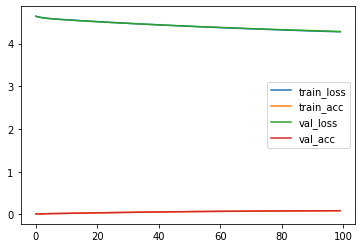

In [58]:
import pandas as pd
pd.DataFrame(histroy).plot()

In [59]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/developer-jnk/cifar100-pytorch-classification


'https://jovian.ai/developer-jnk/cifar100-pytorch-classification'